# **MACHINE LEARNING**

# **CLASSIFICATION**

# **DATASET - HEART DISEASE UCI**

In [39]:
#import libraries
import pandas as pd
import numpy as np

In [40]:
#Loading dataset
df=pd.read_csv("/content/HeartDiseaseTrain-Test.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [42]:
df.shape

(1025, 14)

In [43]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

Mean 54.43414634146342
Median 56.0
Mode 0    58
Name: age, dtype: int64


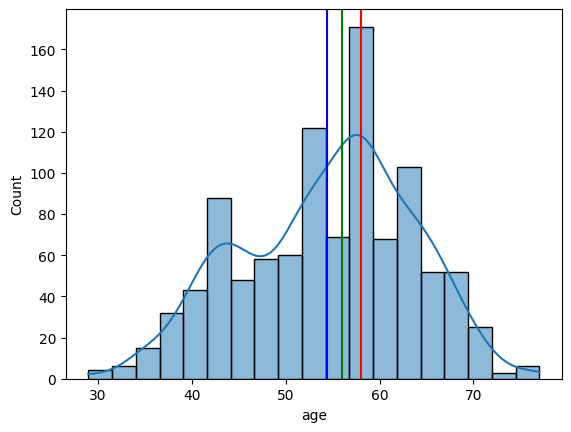

In [44]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(), color='Blue')
plt.axvline(df['age'].median(), color='Green')
plt.axvline(df['age'].mode()[0], color='Red')
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())

Gender analysis

In [45]:
import plotly.express as px
fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

In [46]:
df['sex'].value_counts()

sex
Male      713
Female    312
Name: count, dtype: int64

In [47]:
male_count= 713
female_count = 312
total_count = male_count + female_count
# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100
# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')
# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')

Male percentage i the data: 69.56%
Female percentage in the data : 30.44%
Males are 128.53% more than female in the data.


cp based analysis

In [48]:
df['chest_pain_type'].value_counts()

chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

<Axes: xlabel='chest_pain_type', ylabel='count'>

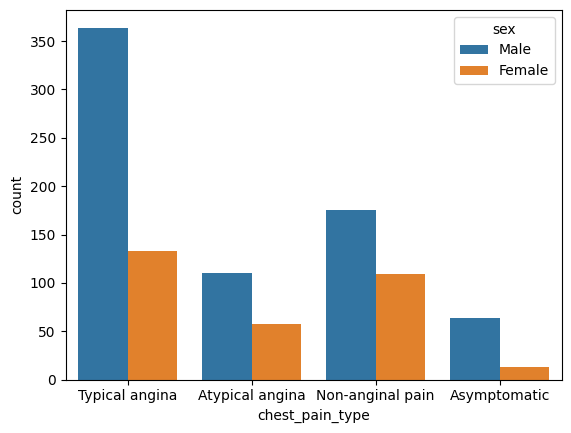

In [49]:
sns.countplot(df, x='chest_pain_type', hue= 'sex')

<Axes: xlabel='sex', ylabel='count'>

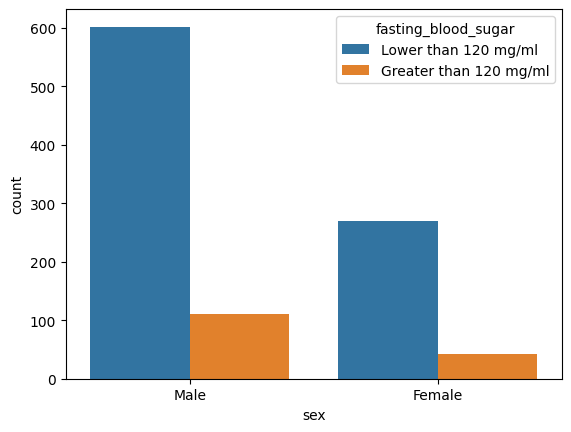

In [50]:
sns.countplot(x='sex',hue='fasting_blood_sugar',data=df)

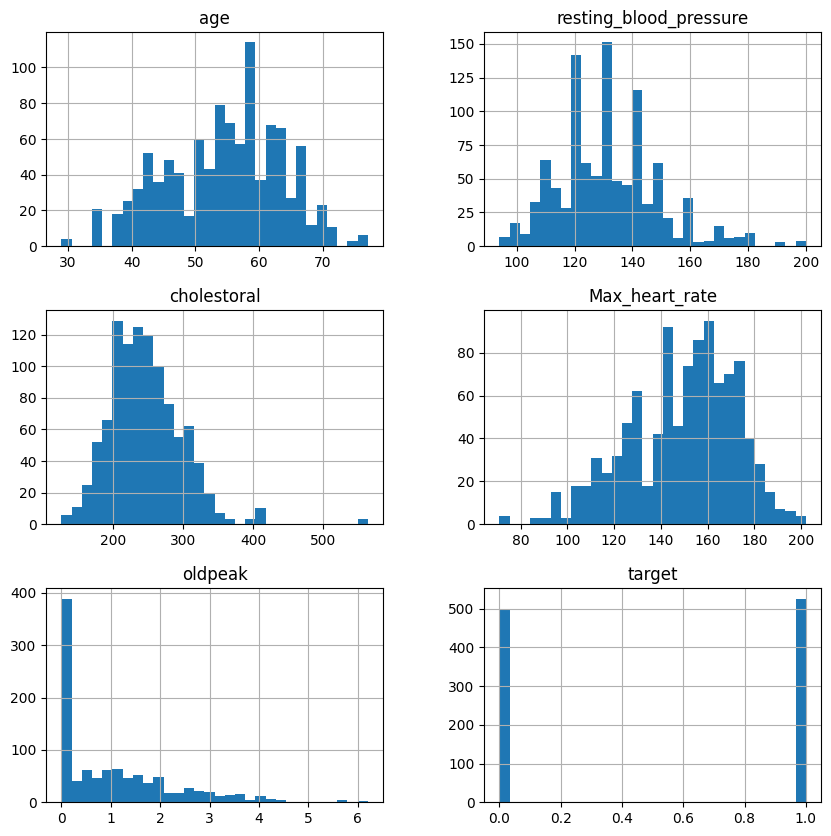

In [51]:
df.hist(bins=30, figsize=(10,10))
plt.show()

In [52]:
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
X= df.drop('target', axis=1)
y = df['target']
Label_Encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

These models should be classifiers for multi_class
classification.

1.Logistic regression,
2.KNN,
3.NB,
4.SVM,
5.Decision Tree,
6.Random Forest,
7.XGBoost,
8.GradientBoosting,
9.AdaBoost,
10.lightGBM.




**LOGISTIC** **REGRESSION**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [15]:

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8058252427184466
Confusion Matrix:
[[44 14]
 [ 6 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        58
           1       0.74      0.87      0.80        45

    accuracy                           0.81       103
   macro avg       0.81      0.81      0.81       103
weighted avg       0.82      0.81      0.81       103



**GRADIENT** **BOOSTING**

In [18]:
# Create a gradient boosting classifier
model = GradientBoostingClassifier()
# Train the model
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [19]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9320388349514563
Confusion Matrix:
[[56  2]
 [ 5 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.95      0.89      0.92        45

    accuracy                           0.93       103
   macro avg       0.94      0.93      0.93       103
weighted avg       0.93      0.93      0.93       103



**KNN**

In [37]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors can be adjusted
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Make predictions
y_pred = knn.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7669902912621359
Confusion Matrix:
[[43 15]
 [ 9 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        58
           1       0.71      0.80      0.75        45

    accuracy                           0.77       103
   macro avg       0.77      0.77      0.77       103
weighted avg       0.77      0.77      0.77       103



**DECISION** **TREE** **CLASSIFIER**

In [24]:
# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [25]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.970873786407767
Confusion Matrix:
[[58  0]
 [ 3 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



**RANDOM** **FOREST** **CLASSIFIER**

In [26]:
# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.6796116504854369
Confusion Matrix:
[[36 22]
 [11 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        58
           1       0.61      0.76      0.67        45

    accuracy                           0.68       103
   macro avg       0.69      0.69      0.68       103
weighted avg       0.70      0.68      0.68       103



**XGBOOST**

In [30]:
# Create an XGBoost classifier
model = XGBClassifier()
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.970873786407767
Confusion Matrix:
[[58  0]
 [ 3 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



**GRADIENT** **DESCENT**

In [33]:
# Create a gradient boosting classifier
model = GradientBoostingClassifier()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9320388349514563
Confusion Matrix:
[[56  2]
 [ 5 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.95      0.89      0.92        45

    accuracy                           0.93       103
   macro avg       0.94      0.93      0.93       103
weighted avg       0.93      0.93      0.93       103



**ADABOOST**

In [34]:
# Create an AdaBoost classifier
model = AdaBoostClassifier()
# Train the model
model.fit(X_train, y_train)

AdaBoostClassifier()

In [57]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6796116504854369
Confusion Matrix:
[[36 22]
 [11 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        58
           1       0.61      0.76      0.67        45

    accuracy                           0.68       103
   macro avg       0.69      0.69      0.68       103
weighted avg       0.70      0.68      0.68       103



**SVM**

In [58]:
# Create an SVM classifier
model = SVC(kernel='rbf', random_state=42)  # Radial Basis Function (RBF) kernel is commonly used

# Train the model
model.fit(X_train, y_train)


SVC(random_state=42)

In [59]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.6796116504854369
Confusion Matrix:
[[36 22]
 [11 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        58
           1       0.61      0.76      0.67        45

    accuracy                           0.68       103
   macro avg       0.69      0.69      0.68       103
weighted avg       0.70      0.68      0.68       103



In [60]:
models= [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naye base Classifier', GaussianNB())
]
best_model= None
best_accuracy = 0.0
#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])
    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_accuracy= scores.mean()
    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    # make prediction on the test data
    y_pred = pipeline.predict(X_test)
    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    #print the performance metrics
    print("Model", name)
    print("Cross Validatino accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
# Retrieve the best model
print("Best Model: ", best_model)

Model Logistic Regression
Cross Validatino accuracy:  0.8351762632197415
Test Accuracy:  0.8058252427184466

Model Gradient Boosting
Cross Validatino accuracy:  0.9642185663924794
Test Accuracy:  0.9320388349514563

Model KNeighbors Classifier
Cross Validatino accuracy:  0.710358401880141
Test Accuracy:  0.7669902912621359

Model Decision Tree Classifier
Cross Validatino accuracy:  0.9945945945945945
Test Accuracy:  0.970873786407767

Model AdaBoost Classifier
Cross Validatino accuracy:  0.89048178613396
Test Accuracy:  0.8640776699029126

Model Random Forest
Cross Validatino accuracy:  0.9978378378378379
Test Accuracy:  0.970873786407767

Model XGboost Classifier
Cross Validatino accuracy:  0.9945652173913043
Test Accuracy:  0.970873786407767

Model Support Vector Machine
Cross Validatino accuracy:  0.715840188014101
Test Accuracy:  0.6796116504854369

Model Naye base Classifier
Cross Validatino accuracy:  0.8253819036427732
Test Accuracy:  0.7961165048543689

Best Model:  Pipeline(st

Output:

The Decision Tree Classifier has:

A very high cross-validation accuracy of 99.46%.

A high test accuracy of 97.09%.

# **REGRESSION**

# **DATASET - SUPERMARKET_SALES**

In [20]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv("/content/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [23]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [24]:
df.shape

(1000, 17)

In [25]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

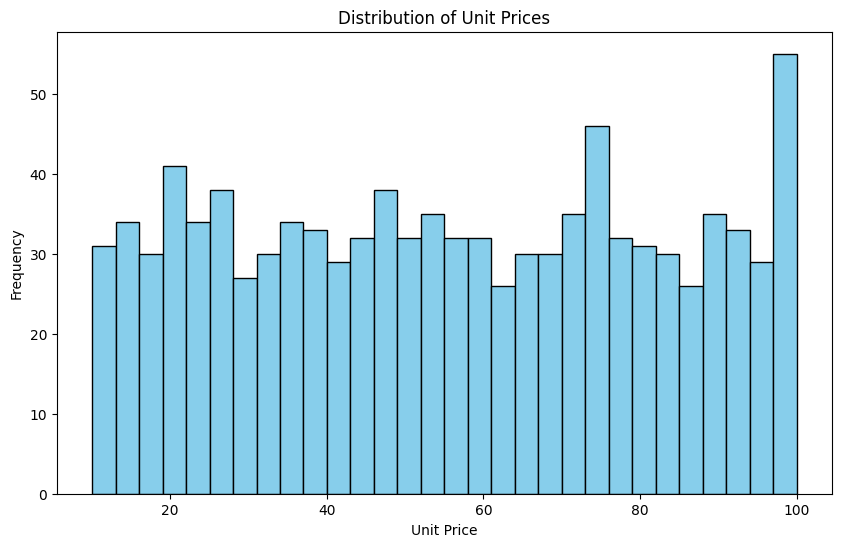

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Unit price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


In [27]:
from sklearn.preprocessing import LabelEncoder
# Handle missing values if any
df = df.dropna()
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
# Define the feature matrix and target vector
# Assuming 'Total' is the target variable (adjust if needed)
X = df.drop(columns=['Total'])
y = df['Total']

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = '/content/supermarket_sales.csv'
df = pd.read_csv(file_path)

# Display the first few rows and columns to understand the structure
print(df.head())
print(df.columns)

# Data preprocessing
df = pd.get_dummies(df, drop_first=True)

# Check if 'Invoice ID' is in the columns and drop it if it exists
if 'Invoice ID' in df.columns:
    df = df.drop(['Invoice ID'], axis=1)

# Train-test split
features = df.drop(['Total'], axis=1)
target = df['Total']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}')

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test, model_name)


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  01-05-2019  13:08      Ewallet  522.83                 4.761905   
1  03-08-2019  10:29         Cash   76.40                 4.761905   
2  03-03-2019  13:23

In [31]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}')

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test, model_name)


Linear Regression - MSE: 8.48010568987929e-07, MAE: 0.0007091416588265531, R2: 0.9999999999869655
Decision Tree Regression - MSE: 3.8599847999999977, MAE: 1.2122249999999999, R2: 0.9999406694781063
Random Forest Regression - MSE: 1.7552136199105683, MAE: 0.7489308749999921, R2: 0.9999730212046161
Gradient Boosting Regression - MSE: 5.1709995358350564, MAE: 1.693296886272827, R2: 0.9999205183136541


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/supermarket_sales.csv')

# Display the first few rows and columns to understand the structure
print(df.head())
print(df.columns)

# Data preprocessing
df = pd.get_dummies(df, drop_first=True)

# Check if 'Invoice ID' is in the columns and drop it if it exists
if 'Invoice ID' in df.columns:
    df = df.drop(['Invoice ID'], axis=1)

# Train-test split
features = df.drop(['Total'], axis=1)
target = df['Total']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}, MAE: {mae_lasso}, R2: {r2_lasso}')


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  01-05-2019  13:08      Ewallet  522.83                 4.761905   
1  03-08-2019  10:29         Cash   76.40                 4.761905   
2  03-03-2019  13:23

Ridge Regression - MSE: 3.1784960563442814e-09, MAE: 4.384754124422408e-05, R2: 0.9999999999999512


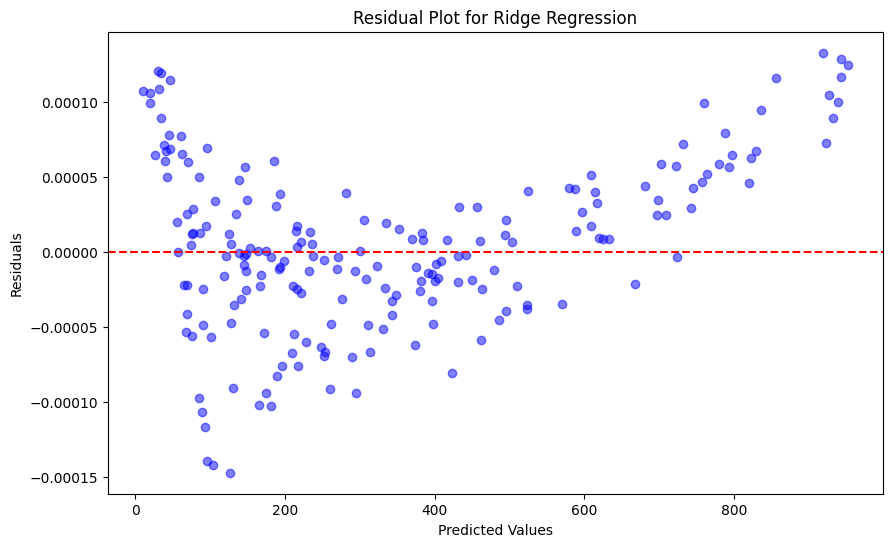

In [16]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - MSE: {mse_ridge}, MAE: {mae_ridge}, R2: {r2_ridge}')
residuals = y_test - y_pred_ridge
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ridge Regression')
plt.show()

In [14]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print(f'Elastic Net Regression - MSE: {mse_elastic_net}, MAE: {mae_elastic_net}, R2: {r2_elastic_net}')


Elastic Net Regression - MSE: 2.164271483601558e-05, MAE: 0.0038158601480911703, R2: 0.9999999996673371


Analysis
MSE and MAE: Lower values are better.
R-squared (R2): Higher values closer to 1 are better.

Here are the performance metrics for each model:

Linear Regression

MSE: 8.48010568987929e-07
MAE: 0.0007091416588265531
R2: 0.9999999999869655

Decision Tree Regression

MSE: 3.8599847999999977
MAE: 1.2122249999999999
R2: 0.9999406694781063

Random Forest Regression

MSE: 1.7552136199105683
MAE: 0.7489308749999921
R2: 0.9999730212046161

Gradient Boosting Regression

MSE: 5.1709995358350564
MAE: 1.693296886272827
R2: 0.9999205183136541

Lasso Regression

MSE: 2.0600231421633876e-05
MAE: 0.0037228250744092504
R2: 0.9999999996833608

Ridge Regression

MSE: 3.1784960563442814e-09
MAE: 4.384754124422408e-05
R2: 0.9999999999999512

Elastic Net Regression

MSE: 2.164271483601558e-05
MAE: 0.0038158601480911703
R2: 0.9999999996673371




Ridge Regression has the lowest MSE (3.1784960563442814e-09) compared to all other models, indicating it makes predictions that are extremely close to the actual values.
Ridge Regression has the lowest MAE (4.384754124422408e-05), further supporting the observation that the predictions are very accurate.
Ridge Regression has the highest R2 value (0.9999999999999512), indicating it explains almost all the variability in the target variable.